In [8]:
#---------------激活函数对比----------------
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
x = np.linspace(-10, 10, 50)
print(x)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


In [22]:
#激活函数
x_relu = tf.nn.relu(x)
print(x_relu)
x_sigmoid = tf.nn.sigmoid(x)
x_tanh = tf.nn.tanh(x)
x_leak_relu = tf.nn.leaky_relu(x)
x_softplus = tf.nn.softplus(x)

Tensor("Relu_2:0", shape=(50,), dtype=float64)


In [28]:
with tf.Session() as sess:
    y_relu = sess.run(x_relu)
    y_sigmoid = sess.run(x_sigmoid)
    y_tanh = sess.run(x_tanh)
    y_leak_relu = sess.run(x_leak_relu)
    y_softplus = sess.run(x_softplus)

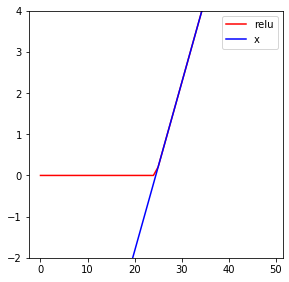

In [34]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_relu, c='red', label='relu')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

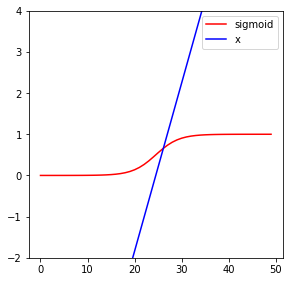

In [33]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_sigmoid, c='red', label='sigmoid')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

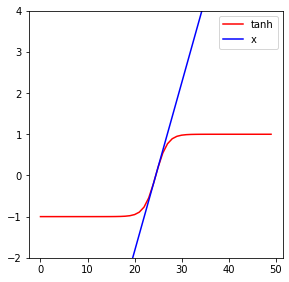

In [32]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_tanh, c='red', label='tanh')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

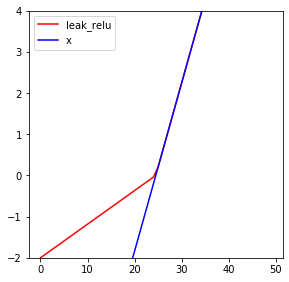

In [35]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_leak_relu, c='red', label='leak_relu')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

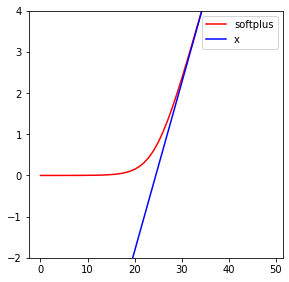

In [36]:
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(y_softplus, c='red', label='softplus')
plt.plot(x, c='blue', label='x')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

In [ ]:
#--------------激活函数求导--------------

In [50]:
x1 = tf.linspace(-10.0, 10.0, 50)
print(x1)

Tensor("LinSpace_1:0", shape=(50,), dtype=float32)


In [74]:
with tf.GradientTape(persistent=True) as t:
    t.watch(x1)
    z_sigmoid = 1/ (1 + tf.exp(-x1))  # 公式
    z_tanh = (tf.exp(x1) - tf.exp(-x1))/(tf.exp(x1) + tf.exp(-x1))
    z_relu = tf.maximum(0.0, x1)
    z_leak_relu = tf.maximum(0.1*x1, x1)  # alpha = 0.1 alpha系数 
    z_softplus = tf.log(1 + tf.exp(x1))
    dz_sigmoid_dx1 = t.gradient(z_sigmoid, x1)
    dz_tanh_dx1 = t.gradient(z_tanh, x1)
    dz_relu_dx1 = t.gradient(z_relu, x1)
    dz_leak_relu_dx1 = t.gradient(z_leak_relu, x1)
    dz_softplus_dx1 = t.gradient(z_softplus, x1)
    

with tf.Session() as sess:
    sigmoid_d =sess.run(dz_sigmoid_dx1)  # sigmoid导数
    tanh_d = sess.run(dz_tanh_dx1)   # tanh的导数
    relu_d = sess.run(dz_relu_dx1)  # relu的导数
    leak_relu_d = sess.run(dz_leak_relu_dx1)  # leak_relu的导数
    softplus_d = sess.run(dz_softplus_dx1)  # softplus的导数
    x1_ = sess.run(x1)

----sigmoid函数的导数曲线----
1、sigmoid 导数最大取值1/4， 在梯度下降求导时会使梯度逐渐减小至消失；2、当初始权重较大（1，无穷）时，会产生梯度爆炸；3、输出为0均值，导致每个batch梯度更新的方向相同，导致收敛缓慢；4、幂运算，耗时


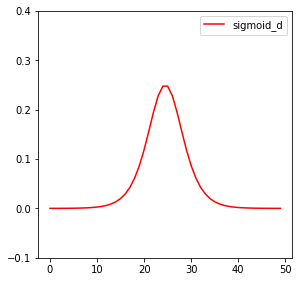

In [84]:
# -*- coding:utf-8 -*-
print("----sigmoid函数的导数曲线----")
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(sigmoid_d, c='red', label='sigmoid_d')
# plt.plot(x1_, c='blue', label='x')
plt.ylim((-0.1, 0.4))
plt.legend(loc='best')
plt.show()
print("1、sigmoid 导数最大取值1/4， 在梯度下降求导时会使梯度逐渐减小至消失；"
      "2、当初始权重较大（1，无穷）时，会产生梯度爆炸；"
      "3、输出为0均值，导致每个batch梯度更新的方向相同，导致收敛缓慢；"
      "4、幂运算，耗时")

----tanh函数的导数曲线----
它解决了Sigmoid函数的不是zero-centered输出问题，然而，梯度消失（gradient vanishing）的问题和幂运算的问题仍然存在


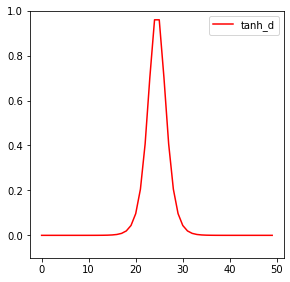

In [80]:
print("----tanh函数的导数曲线----")
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(tanh_d, c='red', label='tanh_d')
# plt.plot(x1_, c='blue', label='x')
plt.ylim((-0.1, 1))
plt.legend(loc='best')
plt.show()
print("它解决了Sigmoid函数的不是zero-centered输出问题，然而，"
      "梯度消失（gradient vanishing）的问题和幂运算的问题仍然存在")

----relu函数的导数曲线----
1）解决了梯度消失问题 (在正区间)；2）计算速度非常快，只需要判断输入是否大于0；3）收敛速度远快于sigmoid和tanh4）存在Dead ReLU Problem， 负区间参数不更新


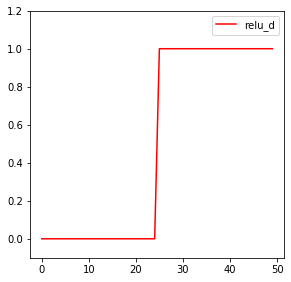

In [87]:
print("----relu函数的导数曲线----")
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(relu_d, c='red', label='relu_d')
# plt.plot(x1_, c='blue', label='x')
plt.ylim((-0.1, 1.2))
plt.legend(loc='best')
plt.show()
print("1）解决了梯度消失问题 (在正区间)；"
      "2）计算速度非常快，只需要判断输入是否大于0；"
      "3）收敛速度远快于sigmoid和tanh"
      "4）存在Dead ReLU Problem， 负区间参数不更新")

----leak_relu函数的导数曲线----
解决Dead ReLU Problem


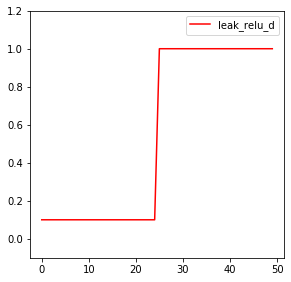

In [88]:
print("----leak_relu函数的导数曲线----")
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(leak_relu_d, c='red', label='leak_relu_d')
# plt.plot(x1_, c='blue', label='x')
plt.ylim((-0.1, 1.2))
plt.legend(loc='best')
plt.show()
print("解决Dead ReLU Problem")

----softplus函数的导数曲线----
relu函数的平滑版


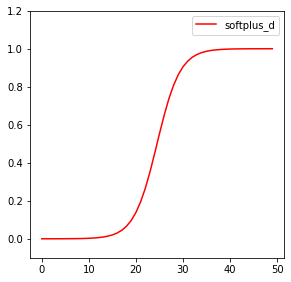

In [89]:
print("----softplus函数的导数曲线----")
plt.figure(1, figsize=(10, 10))
plt.subplot(221)
plt.plot(softplus_d, c='red', label='softplus_d')
# plt.plot(x1_, c='blue', label='x')
plt.ylim((-0.1, 1.2))
plt.legend(loc='best')
plt.show()
print("relu函数的平滑版")
